# Michell Luiz Costalonga

# Exercício - Módulo 9

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Algorítmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Pré processamento
from sklearn.preprocessing import StandardScaler

# Métricas de performance
from sklearn.metrics import mean_squared_error, r2_score

# Validação cruzada
from sklearn.model_selection import cross_val_score

In [2]:
# Importando os dados
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

## Estrutura do dataframe

In [3]:
linhas, colunas = df.shape
print('O dataframe possui %d linhas e %d colunas.' %(linhas, colunas))

O dataframe possui 1044 linhas e 17 colunas.


## Tipos de dados

In [4]:
tipos = df.dtypes
tipos

sex           object
age            int64
famsize       object
Pstatus       object
traveltime     int64
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
absences       int64
G3             int64
dtype: object

## Quantidade de dados nulos

In [5]:
dados_nulos = df.isnull().sum()
dados_nulos

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [6]:
if (dados_nulos.sum() == 0):
    print('O dataframe não possui nenhum dado faltante.')
else:
    print('O dataframe possui %d dados faltantes no total.' %(dados_nulos.sum()),end='\n\n')

O dataframe não possui nenhum dado faltante.


## Categorias de cada variável dependente.

In [7]:
# Distribuição geral da variável sex em função de G3

for item in df.columns:
    df_ = df[item].value_counts().sort_index()
    print('Distribuição da categoria por %s: ' %(item))
    print(df_, end='\n\n')

Distribuição da categoria por sex: 
F    591
M    453
Name: sex, dtype: int64

Distribuição da categoria por age: 
15    194
16    281
17    277
18    222
19     56
20      9
21      3
22      2
Name: age, dtype: int64

Distribuição da categoria por famsize: 
GT3    738
LE3    306
Name: famsize, dtype: int64

Distribuição da categoria por Pstatus: 
A    121
T    923
Name: Pstatus, dtype: int64

Distribuição da categoria por traveltime: 
1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64

Distribuição da categoria por studytime: 
1    317
2    503
3    162
4     62
Name: studytime, dtype: int64

Distribuição da categoria por schoolsup: 
no     925
yes    119
Name: schoolsup, dtype: int64

Distribuição da categoria por famsup: 
no     404
yes    640
Name: famsup, dtype: int64

Distribuição da categoria por paid: 
no     824
yes    220
Name: paid, dtype: int64

Distribuição da categoria por activities: 
no     528
yes    516
Name: activities, dtype: int64

Distribuição da 

Vemos que as variáveis dependentes do tipo object apresentam apenas duas categorias. A seguinte mudança será feita para esses dados:

- no = 0
- yes = 0

Variável famsize:

- LT3 (no maximo 3 pessoas por família) = 0
- GT3 (mais de 3 pessoas por família) = 1

Variável Pstatus:

- A (mora separado dos pais) = 0
- T (mora junto com os pais) = 1

Variável sex:

- F = 0
- M = 1

In [8]:
# Criando uma cópia do dataframe original:
df_original = df.copy()

# Selecionando a lista de variáveis dependentes que são do tipo "object"
lista_objetos = []
i = 0
for item in tipos:
    if (item == 'O'):
        lista_objetos.append(df.columns[i])
        i += 1
    else:
        i += 1

# Substituindo os parâmetros como descrito acima.

for item in lista_objetos:
    if (item == 'sex'):
        df[item].replace(('F', 'M'), (0, 1), inplace=True)
    elif (item == 'Pstatus'):
        df[item].replace(('A', 'T'), (0, 1), inplace=True)
    elif (item == 'famsize'):
        df[item].replace(('LE3', 'GT3'), (0, 1), inplace=True)
    else:
        df[item].replace(('no', 'yes'), (0, 1), inplace=True)
        
# Imprimindo nova matriz:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,18,1,0,2,2,1,0,0,0,0,0,4,3,4,6,6
1,0,17,1,1,1,2,0,1,0,0,1,0,5,3,3,4,6
2,0,15,0,1,1,2,1,0,1,0,1,0,4,3,2,10,10
3,0,15,1,1,1,3,0,1,1,1,1,1,3,2,2,2,15
4,0,16,1,1,1,2,0,1,1,0,0,0,4,3,2,4,10


In [9]:
# Checando os tipos de dados, novamente.
tipos = df.dtypes
tipos

sex           int64
age           int64
famsize       int64
Pstatus       int64
traveltime    int64
studytime     int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
absences      int64
G3            int64
dtype: object

In [10]:
# Verificando se existem dados nulos:
dados_nulos = df.isnull().sum()
dados_nulos

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

## Checando o índice de correlação de Pearson das variáveis dependentes com a variável independente (target)

Utilizando o índice de correlação de Pearson, podemos verificar se há uma dependência linear entre as variáveis dependentes e a variável target.

In [11]:
df[df.columns[0:]].corr()['G3'][:-1]

sex          -0.031472
age          -0.125282
famsize      -0.061209
Pstatus      -0.030693
traveltime   -0.102627
studytime     0.161629
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
Name: G3, dtype: float64

Observamos que todas apresentam uma baixa correlação linear com a variável target. Caso fôssemos escolher apenas uma variável, poderíamos escolher 'studytime', que apresenta o maior índice de correlação positivo, ou 'age', que apresenta o menor índice de correlação negativo. Para o caso em questão, consideraremos todas as variáveis para treinar e testar o modelo de aprendizado de máquina que será escolhido.

# Verificando visualmente como a variável target se comporta em função de cada variável dependente.

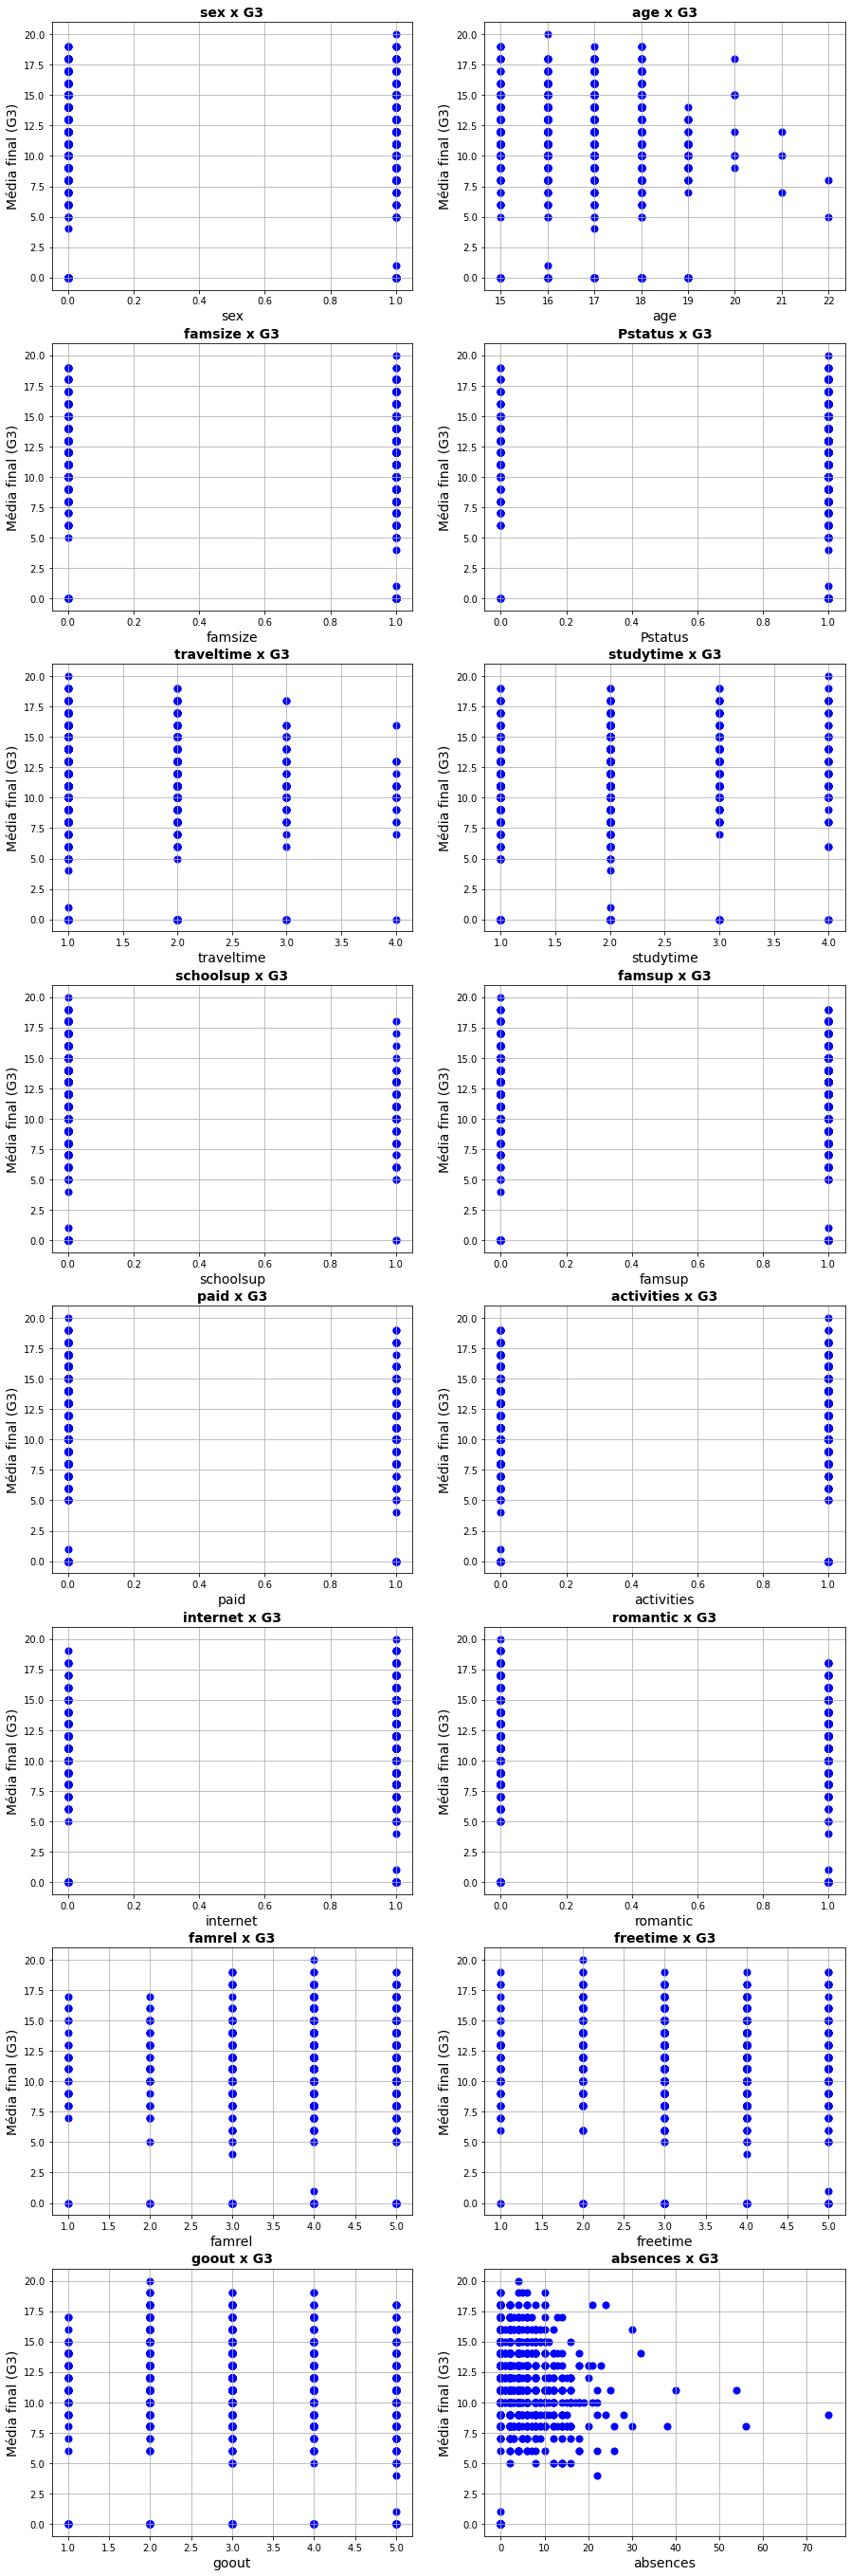

In [12]:
# Plotando os gráficos
i = 1
plt.figure(figsize=[15,55])

for item in df.columns:
    if (item != 'G3'):
        plt.subplot(9,2,i)
        plt.title(item + ' x G3', fontsize = 14, fontweight = 'bold')
        plt.scatter(df[item], df['G3'], s = 50, c = 'blue')
        plt.xlabel(item, fontsize = 14)
        plt.ylabel('Média final (G3)', fontsize = 14)
        plt.grid()
        i += 1

plt.show()

Visualizando os gráficos é dificil identificar alguma tendência de linearidade, como é comprovado pelo índice de correlação de Pearson, calculado anteriormente. Os valores próximos de zero indicam que as variáveis independentes não apresentam relação linear com a variável target.

# Verificando os outliers de cada variável

Além das variáveis dependentes que eram objetos ('sex', 'famsize', 'Pstatus', ...), variáveis como 'traveltime', 'studytime', 'famrel', 'freetime' e 'goout' são variáveis categórias e não faz sentido avaliar outliers nas mesmas. Dessa forma, adicionaremos as mesmas à uma lista de colunas que deverão ser ignoradas.

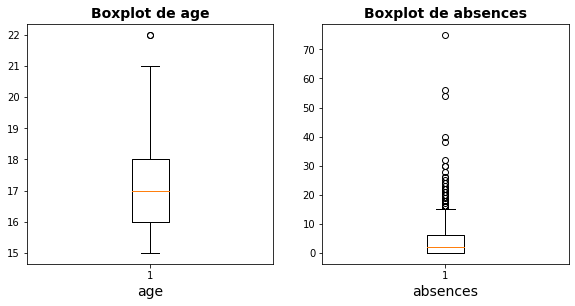

In [13]:
# Plotando os gráficos
var_categoricas = lista_objetos
novas_var = ['traveltime', 'studytime', 'famrel', 'freetime', 'goout']
var_categoricas.extend(novas_var)

i = 1
plt.figure(figsize=[15,15])

for item in df.columns:
    if (item != 'G3'):
        if (var_categoricas.count(item) < 1):
            plt.subplot(3,3,i)
            plt.title('Boxplot de ' + item, fontsize = 14, fontweight = 'bold')
            plt.boxplot(df[item])
            plt.xlabel(item, fontsize = 14)
            i += 1
            
plt.show()

Observamos que existem diversos outliers relacionados ao número de faltas (absences) e apenas um outlier relacionado à idade (age). Inicialmente, consideraremos os outliers e veremos como o modelo escolhido responde a esse teste.

# Tratamento de variáveis categóricas

Como as variáveis categóricas 'traveltime', 'studytime', 'famrel', 'freetime' e 'goout' já apresentam um formato numérico e não realizaremos outro tratamento.

In [14]:
variaveis_cat = ['traveltime', 'studytime', 'famrel', 'freetime', 'goout']

# Normalização as variáveis numéricas

Antes de fazer a seleção e treinamento do modelo, será realizada a normalização das variáveis numéricas usando a normalização padrão (StandardScaler do sklearn.preprocessing).

In [15]:
# Instanciando a função
ss = StandardScaler()

# Criando uma cópia dos dados originais
df_norm = df.copy()

# Escolheremos as variáveis numéricas para normalizar.
variaveis = ['age', 'absences']

for item in df_norm.columns:
    if (variaveis.count(item) == 1):
        ss.fit(df[item].values.reshape(-1,1))
        df_norm[item] = ss.transform(df_norm[item].values.reshape(-1,1))
    elif (item == 'G3'):
        df_norm[item] = df[item].values
    else:
        continue

# Impriminto dataframe normalizada
df_norm.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,1.027889,1,0,2,2,1,0,0,0,0,0,4,3,4,0.252155,6
1,0,0.221035,1,1,1,2,0,1,0,0,1,0,5,3,3,-0.070060,6
2,0,-1.392674,0,1,1,2,1,0,1,0,1,0,4,3,2,0.896584,10
3,0,-1.392674,1,1,1,3,0,1,1,1,1,1,3,2,2,-0.392275,15
4,0,-0.585820,1,1,1,2,0,1,1,0,0,0,4,3,2,-0.070060,10


# Início da seleção do modelo

Antes de iniciar a seleção e o treinamento do modelo, iremos separar os dados usando a função divide_dados.

### Informações sobre a função *divide_dados*:

__Resumo__: A função embaralha os dados de um dataframe de entrada de forma aleatória e retorna dois dataframes para treino e teste de modelos de aprendizado de máquina.

- Parâmetros de entrada: __df___ e __p__
    - __df___ é o dataframe de entrada;
    - __p__ é a porcentagem do número de linhas que será usado para criar os dados de treino, onde __0 < p < 1__.
    
- Parâmetros de saída: A função retornará dois dataframes, logo, deve-se declarar duas variáveis ao instanciar a função.
    - __df_treino__: dataframe com os dados para treino do modelo
    - __df_teste__: dataframe com os dados para teste do modelo.
    
Caso o segundo parâmetro de entrada "p" não seja informado ao instanciar a função, será considerado o valor padrão p = 0.75. Ou seja, 75% das linhas serão usadas para criar o dataframe de treino (df_treino) e o restante para o dataframe de teste (df_teste).

In [16]:
# Função criada na parte 1 do módulo 8:
def divide_dados(df_, p = 0.75):
    # Embaralhando o dataframe de forma aleatória.
    df_ = shuffle(df_)
    
    # Dividindo o dataframe em dados para treino e teste
    df_treino = df_.iloc[:int(round(df_.shape[0] * p, 0)), :]
    df_teste = df_.iloc[int(round(df_.shape[0] * p, 0)):, :]
    
    print('O dataframe original possui %d linhas e %d colunas.' %(df_.shape[0], df_.shape[1]), end='\n\n')
    
    print('***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****', end='\n\n')
    print('O dataframe de treino poussi %d linhas e %d colunas.' %(df_treino.shape[0], df_treino.shape[1]), end='\n\n')
    print('O dataframe de teste poussi %d linhas e %d colunas.' %(df_teste.shape[0], df_teste.shape[1]), end='\n\n')
    print('A soma do número de linhas dos dataframes de treino e de teste é %d.' %(df_treino.shape[0] + df_teste.shape[0]))
    
    return df_treino, df_teste

# Criando os dataframes de treino e teste a partir do original usando a função divide_dados. 
df_treino, df_teste = divide_dados(df_norm)

O dataframe original possui 1044 linhas e 17 colunas.

***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****

O dataframe de treino poussi 783 linhas e 17 colunas.

O dataframe de teste poussi 261 linhas e 17 colunas.

A soma do número de linhas dos dataframes de treino e de teste é 1044.


### Informações sobre a função *separarVar*:

__Resumo__: A função serapara as variáveis independentes da variável dependente. Para isso, deve-se instanciar a função através de duas variáveis. O parâmetro de entrada é um dataframe.

- Parâmetros de entrada: __df___
    - __df___ é o dataframe de entrada: pode ser referente aos dados de treino, ou aos dados de teste;
    
- Parâmetros de saída: A função retornará dois arrays, logo, deve-se declarar duas variáveis ao instanciar a função.
    - __X__: Variáveis independentes
    - __Y__: Variável dependente (variável *target*)

In [17]:
#  Função para calcular a RMSE
def RMSE(ytrue, ypred):
    return round(np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred)),2)

# Função para separar as variáveis independentes da variável dependente.
def separarVar(df_):
    verificador = True
    # Loop para separar as variáveis independentes da variável dependente
    for item in df_.columns:
        if (verificador):
            X = df_[item].values.reshape(-1,1)
            verificador = False
        else:
            if (item != 'G3'):
                X = np.c_[X, df_[item].values.reshape(-1,1)]
            else:
                Y = df_[item].values.reshape(-1,1)
            
    # Transformando a lista para um numpy array
    
    return X, Y # Dados de saída

# Criando dois vetores para representar quando o valor predito é igual ao valor target.
x = y = np.arange(0, 21)

In [18]:
df_treino.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
809,0,2.641599,1,1,2,3,0,0,0,0,1,1,3,2,2,0.574369,15
844,0,-1.392674,1,1,2,1,0,0,0,0,0,0,5,1,2,-0.231167,13
706,0,1.834744,1,1,1,2,0,1,0,1,1,0,4,3,5,1.863228,12
339,0,0.221035,1,0,1,2,0,1,1,0,1,0,4,3,3,-0.070060,10
66,1,-1.392674,1,0,1,4,0,1,0,1,1,1,1,3,3,-0.070060,12


In [19]:
## Separando as variáveis independentes das variáveis dependentes (treino e teste)

X, Y = separarVar(df_treino)
Xt, Yt = separarVar(df_teste)

X[0], Y[0]

(array([0.        , 2.64159865, 1.        , 1.        , 2.        ,
        3.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 3.        , 2.        , 2.        ,
        0.57436928]),
 array([15], dtype=int64))

# Modelo de Múltipla Regressão Linear

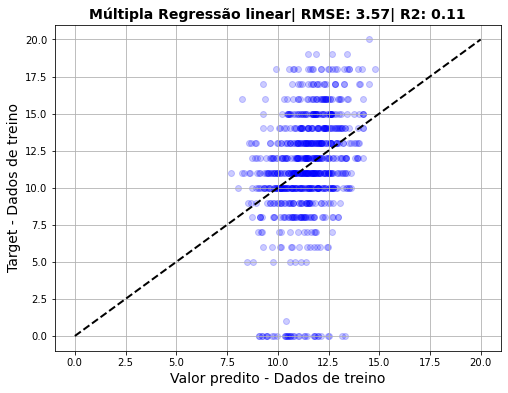

In [20]:
# Instanciando o modelo de regressão linear
lr = LinearRegression()

# Treinando o modelo com os dados de treino
lr.fit(X, Y)

# Calculando RMSE e R2
rmse_lr = RMSE(ytrue = Y, ypred = lr.predict(X))
r2_lr = round(r2_score(y_true = Y, y_pred = lr.predict(X)), 2)

plt.figure(figsize=[8,6])
plt.scatter(lr.predict(X), Y, alpha=0.2, c='blue')
plt.title('Múltipla Regressão linear' + '| RMSE: ' + str(rmse_lr) + '| R2: ' + str(r2_lr), fontsize = 14, fontweight = 'bold')
plt.xlabel("Valor predito - Dados de treino", fontsize = 14)
plt.ylabel("Target - Dados de treino", fontsize = 14)
plt.grid()

#inserindo a reta onde o valor predito é igual ao valor target
plt.plot(x, y, c = 'black', lw = 2, ls='--')
plt.show()

O modelo de regressão linear não apresenta um bom ajuste nem para os dados de treino. Isso já era esperado, pois, os índices de correlação de Pearson indicam o grau de relação linear entre as variáveis dependentes e a variável target. O valor dos índices ficam na faixa de -0.12 < i < 0.16.

# Modelo KNN

In [21]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for item in num_vizinhos:
    # Treinando o modelo
    knn = KNeighborsRegressor(n_neighbors = item).fit(X, Y)
    
    # Calculando RMSE e R2
    rmse_knn = RMSE(ytrue = Y, ypred = knn.predict(X))
    r2_knn = round(r2_score(y_true = Y, y_pred = knn.predict(X)), 2)
    
    print("K = " + str(item) + " | RMSE:" + str(rmse_knn) + " | R2: "+ str(r2_knn))

K = 1 | RMSE:0.36 | R2: 0.99
K = 2 | RMSE:2.35 | R2: 0.61
K = 5 | RMSE:3.0 | R2: 0.37
K = 10 | RMSE:3.3 | R2: 0.24
K = 20 | RMSE:3.47 | R2: 0.15
K = 50 | RMSE:3.58 | R2: 0.1


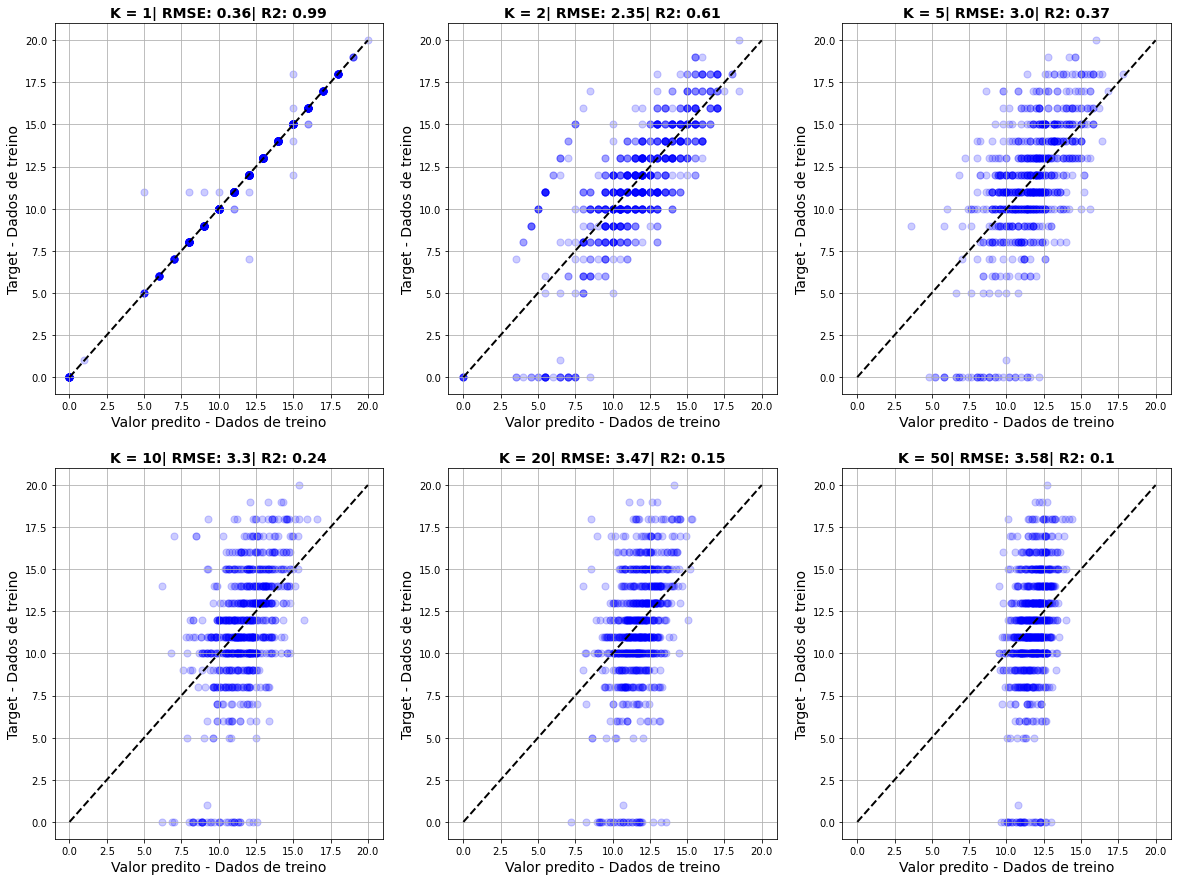

In [22]:
# Plotando alguns gráficos para verificar visualmente a dispersão do resultado.
plt.figure(figsize=[20,15])

i = 1
for item in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = item).fit(X, Y)
    rmse_knn = RMSE(ytrue = Y, ypred = knn.predict(X))
    r2_knn = round(r2_score(y_true = Y, y_pred = knn.predict(X)),2)
    
    plt.subplot(2,3,i)
    plt.title('K = ' + str(item) + '| RMSE: ' + str(rmse_knn) + '| R2: ' + str(r2_knn), fontsize = 14, fontweight = 'bold')
    plt.scatter(knn.predict(X), Y, alpha=0.2, s=50, c='blue')
    plt.plot(x, y, lw=2, c ='black', ls='--')
    plt.xlabel('Valor predito - Dados de treino', fontsize = 14)
    plt.ylabel('Target - Dados de treino', fontsize = 14)
    plt.grid()
    i += 1

plt.show()

A partir dos gráficos e valores calculadors para a RMSE e do R$^2$ acima, vemos que o aumento do número de vizinhos gera um aumento no valor de RMSE e uma diminuição no valor de R$^2$. Antes de testar um dos modelos acima nos dados de teste, iremos realizar a validação cruzada (ou *cross-validation* em inglês) mais adiante.

# Árvores de decisão

In [23]:
# Profundidade da árvore de decisão
max_profundidades = [1, 5, 10, 20, 40, 80]

# Instanciando e testando os valores de profundidades acima
for item in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = item)
    dt.fit(X, Y)
    
    rmse_dt = RMSE(ytrue = Y, ypred = dt.predict(X))
    r2_dt = round(r2_score(y_true = Y, y_pred = dt.predict(X)),2)
    
    print('Profundidade da árvore = ' + str(item) + ' | RMSE:' + str(rmse_dt) + ' | R2: ' + str(r2_dt))

Profundidade da árvore = 1 | RMSE:3.73 | R2: 0.03
Profundidade da árvore = 5 | RMSE:3.29 | R2: 0.24
Profundidade da árvore = 10 | RMSE:2.0 | R2: 0.72
Profundidade da árvore = 20 | RMSE:0.57 | R2: 0.98
Profundidade da árvore = 40 | RMSE:0.56 | R2: 0.98
Profundidade da árvore = 80 | RMSE:0.56 | R2: 0.98


Percebemos um comportamento inverso quando comparado ao modelo KNN. Quanto maior a profundidade da árvore, maior o coeficiente de correlação R$^2$.

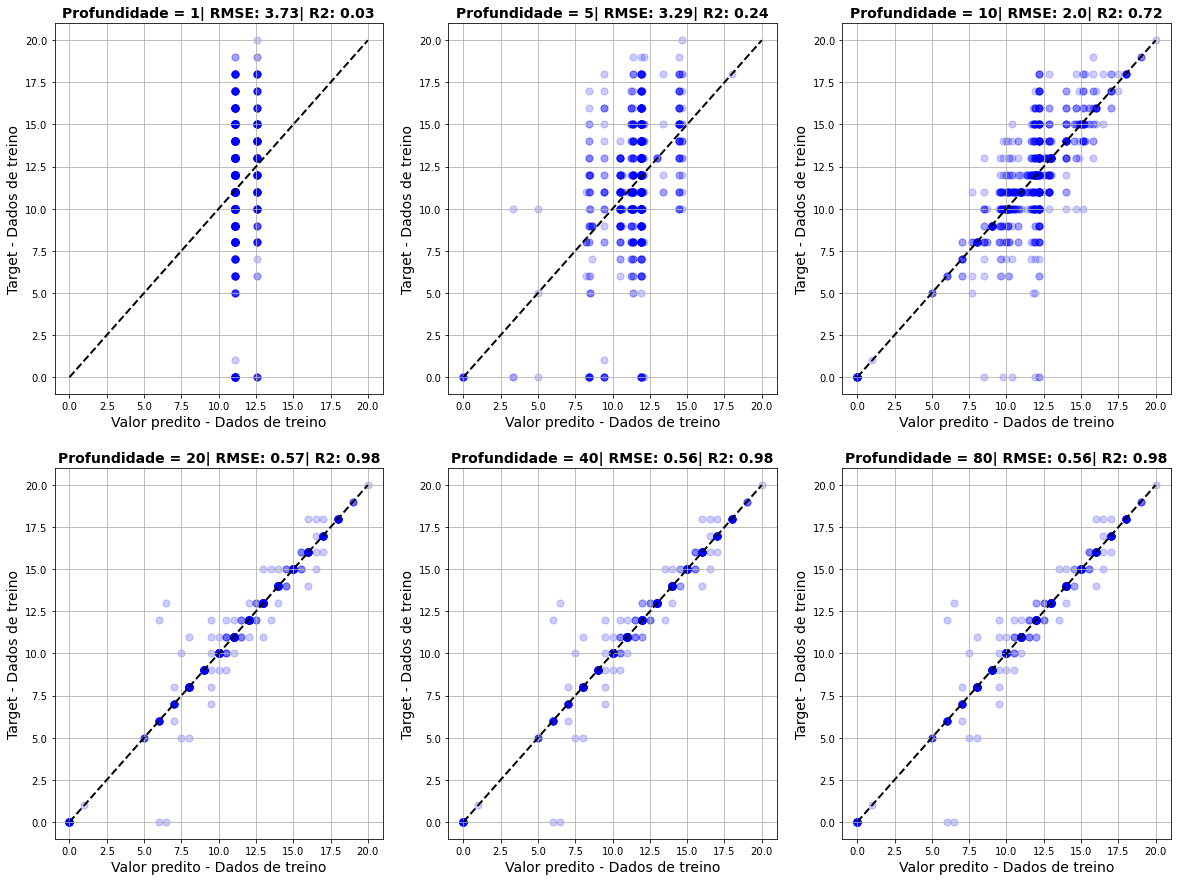

In [24]:
# Plotando alguns gráficos para verificar visualmente a dispersão do resultado.
plt.figure(figsize=[20,15])

i = 1
for item in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = item).fit(X, Y)
    rmse_dt = RMSE(ytrue = Y, ypred = dt.predict(X))
    r2_dt = round(r2_score(y_true = Y, y_pred = dt.predict(X)),2)
    
    plt.subplot(2,3,i)
    plt.title('Profundidade = ' + str(item) + '| RMSE: ' + str(rmse_dt) + '| R2: ' + str(r2_dt), fontsize = 14, fontweight = 'bold')
    plt.scatter(dt.predict(X), Y, alpha=0.2, s=50, c='blue')
    plt.plot(x, y, lw=2, c ='black', ls='--')
    plt.xlabel('Valor predito - Dados de treino', fontsize = 14)
    plt.ylabel('Target - Dados de treino', fontsize = 14)
    plt.grid()
    i += 1

plt.show()

Assim como ocorre para o modelo KNN quando o número de vizinhos é muito pequeno, quando a profundidade das árvores aumentam, os dados sofrem *overfitting*. Isso é, os modelos com profundidade máxima acima de 20 apresentam o *overfitting*.

# Validação cruzada

Iremos verificar se os modelos testados estão fazendo o sobreajuste (*overfitting*) dos dados. Para isso, usaremos a função do scikit-learn que faz a validação cruzada. Consideraremos o número de *folds* igual a 5 (cv = 5)

## Modelo de Múltipla Regressão Linear

In [25]:
cv_lr = cross_val_score(estimator = LinearRegression(), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lr)
print('media: ', cv_lr.mean())
print('desvio padrão: ', cv_lr.std())

[0.09209623 0.03810906 0.07013139 0.05082969 0.05126785]
media:  0.06048684576788623
desvio padrão:  0.018821190813640302


## Modelo KNN

### Número de vizinhos: K = 1

In [26]:
cv_knn1 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 1), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn1)
print('media: ', cv_knn1.mean())
print('desvio padrão: ', cv_knn1.std())

[-0.23698446 -0.95643249 -0.86832068 -1.05458237 -0.41960153]
media:  -0.7071843046305586
desvio padrão:  0.3201770592750617


O resultado nos mostra que o modelo KNN com 1 vizinho está fazendo o *overfitting* dos dados, uma vez que retornou valores negativos e relativamente distantes uns dos outros. Testaremos agora para o modelo KNN com 2 e 5 vizinhos, respectivamente.

### Número de vizinhos: : K = 2

In [27]:
cv_knn2 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 2), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn2)
print('media: ', cv_knn2.mean())
print('desvio padrão: ', cv_knn2.std())

[-0.03379356 -0.31841702 -0.2469755  -0.40675076 -0.13671843]
media:  -0.22853105183160077
desvio padrão:  0.1315554622146702


### Número de vizinhos: : K = 5

In [28]:
cv_knn5 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 5), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn5)
print('media: ', cv_knn5.mean())
print('desvio padrão: ', cv_knn5.std())

[ 0.08364817 -0.05026516  0.01435372 -0.05731275 -0.05948381]
media:  -0.013811965578863595
desvio padrão:  0.05585491073428076


### Número de vizinhos: : K = 10

In [29]:
cv_knn10 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 10), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn10)
print('media: ', cv_knn10.mean())
print('desvio padrão: ', cv_knn10.std())

[ 0.07795709 -0.02028597  0.07240128  0.00549791 -0.03050859]
media:  0.0210123428891452
desvio padrão:  0.04579122656548088


### Número de vizinhos: : K = 20

In [30]:
cv_knn20 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 20), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn20)
print('media: ', cv_knn20.mean())
print('desvio padrão: ', cv_knn20.std())

[ 0.11189041 -0.01416161  0.10662347  0.01084816  0.00419082]
media:  0.04387824871017117
desvio padrão:  0.05403206679510383


### Número de vizinhos: : K = 50

In [31]:
cv_knn50 = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 50), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_knn50)
print('media: ', cv_knn50.mean())
print('desvio padrão: ', cv_knn50.std())

[0.09895458 0.05773525 0.08288316 0.02659706 0.01126065]
media:  0.05548614163638186
desvio padrão:  0.03297160566547255


Percebemos que os modelos apresentam um média muito próxima de zero, ou negativa, o que indica que os modelos não se ajustam bem aos dados de treino.

## Árvore de decisão

### Profundidade: M = 1

In [32]:
cv_dt1 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 1), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt1)
print('media: ', cv_dt1.mean())
print('desvio padrão: ', cv_dt1.std())

[ 0.02010393  0.00826588 -0.01791149  0.0095448  -0.04709034]
media:  -0.005417443508912179
desvio padrão:  0.02431120832282937


### Profundidade: M = 5

In [33]:
cv_dt5 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 5), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt5)
print('media: ', cv_dt5.mean())
print('desvio padrão: ', cv_dt5.std())

[-0.13121198 -0.35198244 -0.02846731 -0.12728319  0.024965  ]
media:  -0.12279598656215888
desvio padrão:  0.12911127117876925


### Profundidade: M = 10

In [34]:
cv_dt10 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 10), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt10)
print('media: ', cv_dt10.mean())
print('desvio padrão: ', cv_dt10.std())

[-0.34580077 -0.86663635 -0.47206493 -0.63059432 -0.32613028]
media:  -0.5282453310363664
desvio padrão:  0.2011350537199699


### Profundidade: M = 20

In [35]:
cv_dt20 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 20), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt20)
print('media: ', cv_dt20.mean())
print('desvio padrão: ', cv_dt20.std())

[-0.51283679 -1.27920925 -0.68405969 -0.75591373 -0.46285104]
media:  -0.7389740987786666
desvio padrão:  0.2907021125404891


### Profundidade: M = 40

In [36]:
cv_dt40 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 40), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt40)
print('media: ', cv_dt40.mean())
print('desvio padrão: ', cv_dt40.std())

[-0.61475856 -1.16552065 -0.67803371 -0.73926134 -0.59876408]
media:  -0.7592676713004357
desvio padrão:  0.20913391678630586


### Profundidade: M = 80

In [37]:
cv_dt80 = cross_val_score(estimator = DecisionTreeRegressor(max_depth = 80), 
                             X = X, 
                             y = Y, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_dt80)
print('media: ', cv_dt80.mean())
print('desvio padrão: ', cv_dt80.std())

[-0.52763013 -1.12165168 -0.73374052 -0.73743495 -0.60532001]
media:  -0.7451554582669457
desvio padrão:  0.20435779181177624


Vemos que nenhum modelo se ajustou bem aos dados, consequentemente, isso se repetirá ao aplicá-los aos dados de teste. Na seção abaixo usaremos o modelo de árvore de decisão com profundidade igual a 5 e o modelo de regressão linear para comprovar.

# Testando dois modelos com os dados de teste

Para efeito de comparação, o modelo escolhido foi o de árvore de decisão com profundidade igual a 5 e o modelo de regressão linear, pois os mesmo apresentaram uns dos maiores valores de R2.

# Múltipla Regressão Linear

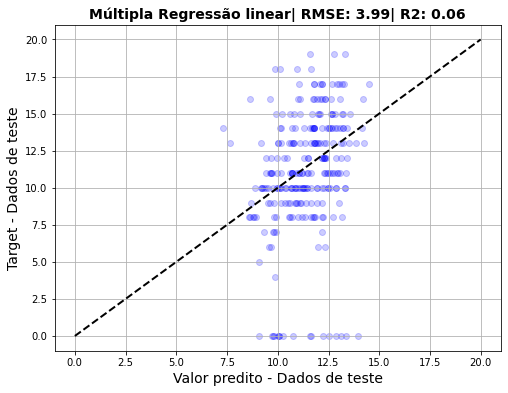

In [38]:
# Treinando o modelo com os dados de treino
lr.fit(X, Y)

# Calculando RMSE e R2
rmse_lr = RMSE(ytrue = Yt, ypred = lr.predict(Xt))
r2_lr = round(r2_score(y_true = Yt, y_pred = lr.predict(Xt)), 2)

plt.figure(figsize=[8,6])
plt.scatter(lr.predict(Xt), Yt, alpha=0.2, c='blue')
plt.title('Múltipla Regressão linear' + '| RMSE: ' + str(rmse_lr) + '| R2: ' + str(r2_lr), fontsize = 14, fontweight = 'bold')
plt.xlabel("Valor predito - Dados de teste", fontsize = 14)
plt.ylabel("Target - Dados de teste", fontsize = 14)
plt.grid()

#inserindo a reta onde o valor predito é igual ao valor target
plt.plot(x, y, c = 'black', lw = 2, ls='--')
plt.show()

# Árvore de decisão: Profundidade = 5

Profundidade da árvore = 10 | RMSE:4.04 | R2: 0.04


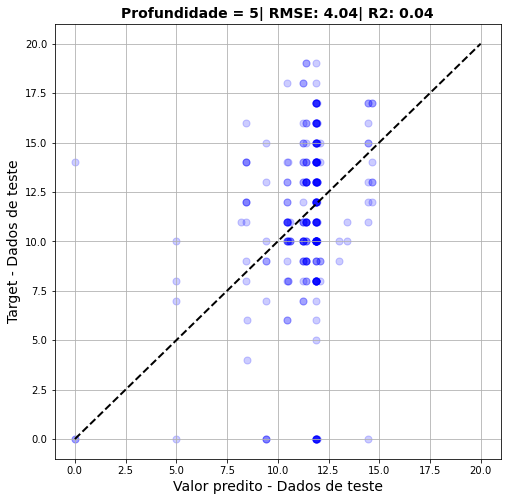

In [39]:
# Treinando os modelos com os dados de treino
dtt = DecisionTreeRegressor(max_depth = 5)
dtt.fit(X, Y)

# Aplicando o modelo aos dados de teste
rmse_dt_teste = RMSE(ytrue = Yt, ypred = dtt.predict(Xt))
r2_dt_teste = round(r2_score(y_true = Yt, y_pred = dtt.predict(Xt)),2)
    
print('Profundidade da árvore = ' + str(10) + ' | RMSE:' + str(rmse_dt_teste) + ' | R2: ' + str(r2_dt_teste))
    
plt.figure(figsize=[8,8])
    
plt.title('Profundidade = ' + str(5) + '| RMSE: ' + str(rmse_dt_teste) + '| R2: ' + str(r2_dt_teste), fontsize = 14, fontweight = 'bold')
plt.scatter(dtt.predict(Xt), Yt, alpha=0.2, s=50, c='blue')
plt.plot(x, y, lw=2, c ='black', ls='--')
plt.xlabel('Valor predito - Dados de teste', fontsize = 14)
plt.ylabel('Target - Dados de teste', fontsize = 14)
plt.grid()

plt.show()

# Conclusão

Para os dados fornecidos, __os modelos testados não podem ser usados para realizar previsões do valor target__, uma vez que nenhum conseguiu se ajustar aos dados de teste (R$^2 \leq 0$). Os valores de R$^2$ negativos indicam que o modelo não segue a tendência dos dados de teste (ou validação no caso da validação cruzada). É possível observar, tambémm, que os modelos KNN e Árvore de decisão se ajustam bem aos dados de treino em alguns casos (valores de R$^2 \approx 0,9$), mas não respondem da mesma forma aos dados de teste (*overfitting*). Além disso, como os índices de correlação de Pearson apresentaram valores próximos de zero (-0,12 < i < 0,15), já era esperado que o modelo de múltipla regressão linear apresentasse um baixo valor para o coeficiente de correlação R$^2$, como visto nos testes realizados acima.

# Dúvidas:

1. Para esse caso, podemos afirmar que nenhum modelo representa bem os dados, uma vez que o R$^2$ na cross validação sempre fornece um valor próximo de zero ou negativo, ou eu errei em algum passo? Eu testei em um outro jupyter notebook usando as funções definidas em aula (separar os dados de treino e teste, normalizar, treinar os modelos), mas ainda assim, o resultado não se alterou. Busquei outros valores para vizinhos e profundidade da árvore, mas nenhum retornou um valor de R$^2$ positivo ao fazer a validação cruzada.


2. Normalização: 
    - Quando devo fazer a normalização de variáveis numéricas (int ou float) e variáveis categóricas (depois de tratadas)?
    - No caso das variáveis categóricas nominais que possuem apenas duas categorias é melhor realizar a alteração para 0 e 1, ou é melhor usar o One Hot Encoder? Exemplo: variável 'sex': 'F' = 0, 'M' = 1; variável 'paid': 'no' = 0, 'yes' = 1; etc.
    - Para variáveis categóricas ordinais (ou até nominais com mais categorias), como 'studytime', temos 4 valores (1 para a menor quantidade de horas de estudo e 4 para a maior quantidade de horas de estudo), é necessário aplicar o OHE? Nesse caso, as informações já foram substituídas por números que dão uma ideia de quantidade, eu deveria fazer a normalização dos mesmos?


3. Inicialmente, fiz um teste sem a normalização, mas não percebi diferença na resposta para esse problema. A normalização é mais indicada quando a faixa de valores trabalhados são mais distantes? Ex: um variável apresenta faixa de 0 a 10, enquanto uma segunda possui uma faixa de -1000 a 1000.


4. Caso o resultado esteja correto, existem outros modelos que veremos mais a frente que irão se ajustar melhor a esse tipo de dado, ou nos próximos módulos conseguiremos criar modelos de aprendizado de máquina que poderão se ajustar melhor?

Por último, gostaria de agracer muito pelos feedbacks que tem me dado.